[Boston Housing dataset download](https://github.com/ArunkumarRamanan/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython

print(tf.__version__)

2.12.0


In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

57026/57026 [==============================] - 0s 0us/step


In [27]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        keras.layers.Dense(1)
    ])
    # model.compile(optimizer=tf.optimizers.Adam(),
    #              loss='mse',
    #              metrics=['mae', 'mse'])
    model.compile('sgd', loss='mse',metrics=['mean_squared_error'])
    return model

In [33]:
# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
.........................................................................
Final Root Mean Square Error on validation set: 2.355


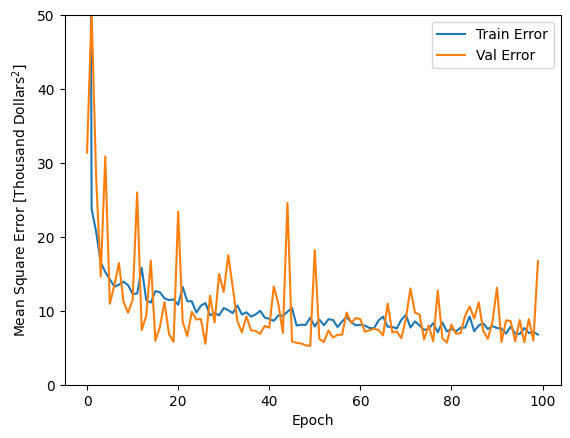

In [29]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,50])

plot_history(history)

In [32]:
test_features_norm = (test_features - train_mean) / train_std
mse, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse_final, 2)))

4/4 [==============================] - 0s 26ms/step - loss: 20.2769 - mean_squared_error: 20.2769
Root Mean Square Error on test set: 4.09
